# Pandas Cheat Sheet 快查表

In [11]:
import pandas as pd

# 1 DataFrame

    DataFrame就是一个SQL的表格Table
    张量：二维矩阵即为二维张量
    一张RGB图是张量
    一个DataFrame 可以被表示成一个json, 也可以被表示成csv,可以被json所初始化

In [12]:
data = {
    'name': ['Alice', 'Bob', 'Charles', 'David', 'Eric'],
    'year': [2017, 2017, 2017, 2017,2017],
    'salary': [40000, 24000, 31000, 20000, 30000],
    'pair':[{'a':1},{'a':2},{'a':3},{'a':4},{'a':5}]
}

In [13]:
d = pd.DataFrame(data)

In [14]:
d

,name,year,salary,pair
0,Alice,2017,40000,{'a': 1}
1,Bob,2017,24000,{'a': 2}
2,Charles,2017,31000,{'a': 3}
3,David,2017,20000,{'a': 4}
4,Eric,2017,30000,{'a': 5}


In [15]:
# 访问数据
d['name']

0      Alice
1        Bob
2    Charles
3      David
4       Eric
Name: name, dtype: object

In [16]:
d.name

0      Alice
1        Bob
2    Charles
3      David
4       Eric
Name: name, dtype: object

In [17]:
# 每一列是Series,相当于数组？
type(d.pair)

pandas.core.series.Series

In [18]:
d.pair.tolist()

[{'a': 1}, {'a': 2}, {'a': 3}, {'a': 4}, {'a': 5}]

In [19]:
d.pair[0]

{'a': 1}

# 2 薪水大于20000的人都有谁？

In [20]:
# 方法一：
d.query('salary>20000')

,name,year,salary,pair
0,Alice,2017,40000,{'a': 1}
1,Bob,2017,24000,{'a': 2}
2,Charles,2017,31000,{'a': 3}
4,Eric,2017,30000,{'a': 5}


In [21]:
# 方法二：
d[d.salary>20000]

,name,year,salary,pair
0,Alice,2017,40000,{'a': 1}
1,Bob,2017,24000,{'a': 2}
2,Charles,2017,31000,{'a': 3}
4,Eric,2017,30000,{'a': 5}


In [22]:
d.salary>20000  # 符合的为True

0     True
1     True
2     True
3    False
4     True
Name: salary, dtype: bool

# 3 Eric 的信息是什么？

In [23]:
d.query('name=="Eric"')

,name,year,salary,pair
4,Eric,2017,30000,{'a': 5}


In [24]:
d[d.name=='Eric']

,name,year,salary,pair
4,Eric,2017,30000,{'a': 5}


In [25]:
d.loc[d.name=='Eric']

,name,year,salary,pair
4,Eric,2017,30000,{'a': 5}


# 4 联合查找：名叫Bob且薪水大于20000?

In [26]:
d.query("name=='Bob' and salary>20000")

,name,year,salary,pair
1,Bob,2017,24000,{'a': 2}


# 5 列操作
d.filter

在SQL中常使用的SELECT name,year,salary from T where salary>20000 and name=='Eric'事实上是对二阶张量的行和列进行操作

In [27]:
d.filter(items=['name', 'year', 'salary'])

,name,year,salary
0,Alice,2017,40000
1,Bob,2017,24000
2,Charles,2017,31000
3,David,2017,20000
4,Eric,2017,30000


In [28]:
d[['name', 'year']]  # 简化方法删选列

,name,year
0,Alice,2017
1,Bob,2017
2,Charles,2017
3,David,2017
4,Eric,2017


# 6 模糊查找

In [29]:
d.filter(like='2', axis=0) # 模糊查找行

,name,year,salary,pair
2,Charles,2017,31000,{'a': 3}


In [30]:
d.filter(like='ea', axis=1) # 模糊查找列

,year
0,2017
1,2017
2,2017
3,2017
4,2017


# 7 分组

In [31]:
df1 = pd.DataFrame(
    {"Name": ["Alice", "Ada", "Mallory", "Mallory", "Billy" , "Mallory"],
     "City": ["Sydney", "Sydney", "Paris", "Sydney", "Sydney", "Paris"]})

In [32]:
df1

,Name,City
0,Alice,Sydney
1,Ada,Sydney
2,Mallory,Paris
3,Mallory,Sydney
4,Billy,Sydney
5,Mallory,Paris


## 7.1 各自城市有多少人

In [33]:
df1.groupby(['City']).count()

,Name
City,
Paris,2
Sydney,4


# 8 统计量分析

In [34]:
# Numerical变量的数据分析
d.describe()

,year,salary
count,5.0,5.000000
mean,2017.0,29000.000000
std,0.0,7615.773106
min,2017.0,20000.000000
25%,2017.0,24000.000000
50%,2017.0,30000.000000
75%,2017.0,31000.000000
max,2017.0,40000.000000


# 9 统计函数

In [35]:
import numpy as np

In [36]:
df2 = pd.DataFrame(
    {'key1':['a', 'a', 'b', 'b', 'a'],
     'key2':['one', 'two', 'one', 'two', 'one'],
     'data1':np.random.randn(5),
     'data2':np.random.randn(5)})

In [37]:
df2

,key1,key2,data1,data2
0,a,one,-0.125396,0.906610
1,a,two,-0.125218,1.138130
2,b,one,-0.647627,0.032730
3,b,two,-0.241577,-1.234523
4,a,one,-0.605268,1.202040


## 9.1 基于属性key1类型a和b各自的均值是多少？
均值是指：包括data1与data2，但是不包括key2,因为key2不是连续型数值。

In [38]:
df2.groupby(['key1']).mean()

,data1,data2
key1,,
a,-0.285294,1.082260
b,-0.444602,-0.600896


## 9.2 联合groupby
'a-one'/'a-two'/'b-one'/'b-two'

In [39]:
df2.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one  -0.365332  1.054325
     two  -0.125218  1.138130
b    one  -0.647627  0.032730
     two  -0.241577 -1.234523

In [40]:
# 统计各个列的数量
df2.count()

key1     5
key2     5
data1    5
data2    5
dtype: int64

In [41]:
# 聚类后各列的统计
df2.groupby(['key1']).count()

,key2,data1,data2
key1,,,
a,3,3,3
b,2,2,2


In [42]:
# 联合分组后各列统计
df2.groupby(['key1', 'key2']).count()

data1  data2
key1 key2              
a    one       2      2
     two       1      1
b    one       1      1
     two       1      1

# 10 排序

In [43]:
df2

,key1,key2,data1,data2
0,a,one,-0.125396,0.906610
1,a,two,-0.125218,1.138130
2,b,one,-0.647627,0.032730
3,b,two,-0.241577,-1.234523
4,a,one,-0.605268,1.202040


In [44]:
df2.data2.sort_values() # 对列进行排序

3   -1.234523
2    0.032730
0    0.906610
1    1.138130
4    1.202040
Name: data2, dtype: float64

In [45]:
df2.sort_values(by='key2') # 整张表按照某一列的数值进行排序

,key1,key2,data1,data2
0,a,one,-0.125396,0.906610
2,b,one,-0.647627,0.032730
4,a,one,-0.605268,1.202040
1,a,two,-0.125218,1.138130
3,b,two,-0.241577,-1.234523


In [46]:
# 多属性的排序
df2.sort_values(by=['key1', 'data1', 'data2'])

,key1,key2,data1,data2
4,a,one,-0.605268,1.202040
0,a,one,-0.125396,0.906610
1,a,two,-0.125218,1.138130
2,b,one,-0.647627,0.032730
3,b,two,-0.241577,-1.234523


In [47]:
df2.sort_values(by='key2', ascending=False)

,key1,key2,data1,data2
1,a,two,-0.125218,1.138130
3,b,two,-0.241577,-1.234523
0,a,one,-0.125396,0.906610
2,b,one,-0.647627,0.032730
4,a,one,-0.605268,1.202040


# 11 协方差和相关性

# 12 DataFrame的增删改查

## 12.1 如何选择某一行

In [48]:
df2.iloc[0]['key1']   # iloc 用行的index取行

'a'

In [49]:
df2.iloc[0].key1

'a'

In [50]:
df2.loc[0]   # 这里[]内部是key，恰巧index与key是相等的

key1            a
key2          one
data1   -0.125396
data2     0.90661
Name: 0, dtype: object

In [51]:
df2.groupby(['key1']).count().iloc[0]

key2     3
data1    3
data2    3
Name: a, dtype: int64

In [52]:
df2.groupby(['key1']).count().loc['a']

key2     3
data1    3
data2    3
Name: a, dtype: int64

In [53]:
df2.iloc[0, 0]

'a'

In [54]:
df2.iloc[:, 0]

0    a
1    a
2    b
3    b
4    a
Name: key1, dtype: object

In [55]:
df2.iloc[:2]   # 前两行

,key1,key2,data1,data2
0,a,one,-0.125396,0.90661
1,a,two,-0.125218,1.13813


In [56]:
df2.iloc[0:-1]

,key1,key2,data1,data2
0,a,one,-0.125396,0.906610
1,a,two,-0.125218,1.138130
2,b,one,-0.647627,0.032730
3,b,two,-0.241577,-1.234523


In [57]:
# 打印前两行后两列
df2.iloc[:2, -2:]

,data1,data2
0,-0.125396,0.90661
1,-0.125218,1.13813


## 12.2 数据的修改
.at[]

In [58]:
df2.at[1,'data1'] = 6

In [59]:
df2

,key1,key2,data1,data2
0,a,one,-0.125396,0.906610
1,a,two,6.000000,1.138130
2,b,one,-0.647627,0.032730
3,b,two,-0.241577,-1.234523
4,a,one,-0.605268,1.202040


In [60]:
df2.iat[1, 3] = 3
df2

,key1,key2,data1,data2
0,a,one,-0.125396,0.906610
1,a,two,6.000000,3.000000
2,b,one,-0.647627,0.032730
3,b,two,-0.241577,-1.234523
4,a,one,-0.605268,1.202040


## 12.3 增加行
.append()
对于DataFrame，每一行实际上代表着一个对象（向量），对于对象（向量）的表示，使用json。

In [61]:
# append()会返回一个新的词表，对于之前的df2并不会改变
df3 = df2.append({'data1':1.3,'data2':1.4, 'key1':'b', 'key2':'two'}, ignore_index=True)

In [62]:
df3

,key1,key2,data1,data2
0,a,one,-0.125396,0.906610
1,a,two,6.000000,3.000000
2,b,one,-0.647627,0.032730
3,b,two,-0.241577,-1.234523
4,a,one,-0.605268,1.202040
5,b,two,1.300000,1.400000


In [63]:
df2.loc[5] = ['c', 'three', 2, 1]
df2

,key1,key2,data1,data2
0,a,one,-0.125396,0.906610
1,a,two,6.000000,3.000000
2,b,one,-0.647627,0.032730
3,b,two,-0.241577,-1.234523
4,a,one,-0.605268,1.202040
5,c,three,2.000000,1.000000


## 12.4 增加列
.assign()
每一列代表一个哈希表，有顺序，因此可是为一个数组或列表。

In [64]:
df3.assign(key3=[1,2,3,4,5,6])  # 列表长度得刚刚好，过长过短都会报错

,key1,key2,data1,data2,key3
0,a,one,-0.125396,0.906610,1
1,a,two,6.000000,3.000000,2
2,b,one,-0.647627,0.032730,3
3,b,two,-0.241577,-1.234523,4
4,a,one,-0.605268,1.202040,5
5,b,two,1.300000,1.400000,6


In [65]:
df4 = df3.assign(key3=[1,2,3,4,5,6])

In [66]:
df3.loc[:, 'key4'] = [6,5,4,3,2,1]

In [67]:
df3

,key1,key2,data1,data2,key4
0,a,one,-0.125396,0.906610,6
1,a,two,6.000000,3.000000,5
2,b,one,-0.647627,0.032730,4
3,b,two,-0.241577,-1.234523,3
4,a,one,-0.605268,1.202040,2
5,b,two,1.300000,1.400000,1


# 13 DataFrame自带绘图

In [68]:
data3 = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 'year': [2012, 2012, 2013, 2014, 2014], 'reports': [4, 24, 31, 2, 3]}

In [69]:
df3 = pd.DataFrame(data3, index = ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'])

In [70]:
df3  # 地名，记者名称，年份，报道数量

,name,year,reports
Cochice,Jason,2012,4
Pima,Molly,2012,24
Santa Cruz,Tina,2013,31
Maricopa,Jake,2014,2
Yuma,Amy,2014,3


In [71]:
df3['reports'].plot.bar()

In [72]:
# import matplotlib.pyplot as plt

In [73]:
# plt.show()

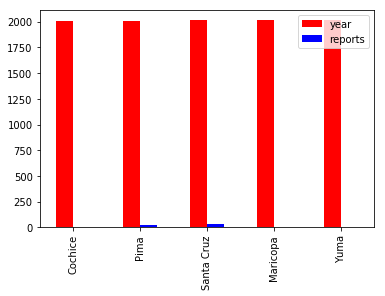

In [74]:
df3.plot.bar(color=['r','b'])  # 只绘数值型的列，离散型的过滤掉了

### 核密度估计（Kernel Density Estimation）

In [75]:
import seaborn as sns

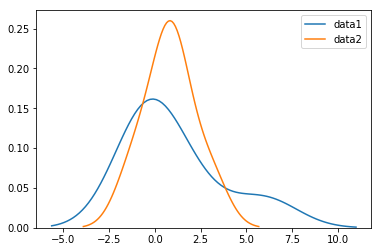

In [76]:
sns.kdeplot(df2['data1'])
sns.kdeplot(df2['data2'])

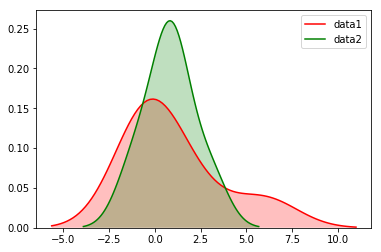

In [77]:
sns.kdeplot(df2['data1'], shade=True, color='r')
sns.kdeplot(df2['data2'], shade=True, color='g')

### 生成一段数据，并进行核密度估计

In [78]:
x=np.random.rand(5000)  # 伪随机会随着样本增大而趋于平均

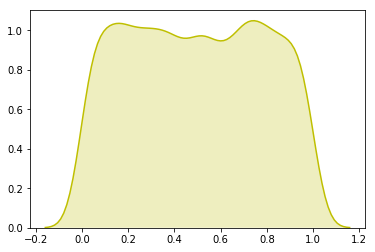

In [79]:
sns.kdeplot(x, shade=True, color='y')